# Scikit-Image
Scikit-Image is an image processing toolkit. 

### Color & Grayscale Images
For color images, **RGB** values are used: they have 3 channels, one for each color (Red,Green,Blue), and the values range from 0 to 255.
* Red - (255,0,0)
* Green - (0,255,0)
* Blue - (0,0,255)

For **Grayscale** Images, each pixel represents only intensity information from 0.0-1.0, where 1 represents extremely bright pixel and 0 represents extremely dark pixel (1 value to represent intensity, thus 1 channel)

**Images** can be represented by a 3-D matrix **(height, width, number of channels)**
* For a Grayscale image: (5,5,1)
* For a Color image: (5,5,3)

ML frameworks (eg. TensorFlow) usually deals with a list of images in one 4-D Tensor **(number of images, height, width, number of channels)** where all the images in the list must be exactly of the same size and same number of channels, for example, (10,5,5,3) represents 10 images of size 5 by 5 having 3 channels. 

In [1]:
import skimage
from skimage import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(skimage.__version__)

0.16.2


#### Create a matrix containing 300 rows and 300 columns having random elements

In [3]:
sample_image=np.random.random([300,300]) # containing random numbers between 0 to 1
sample_image.shape # Building a Grayscale Image

(300, 300)

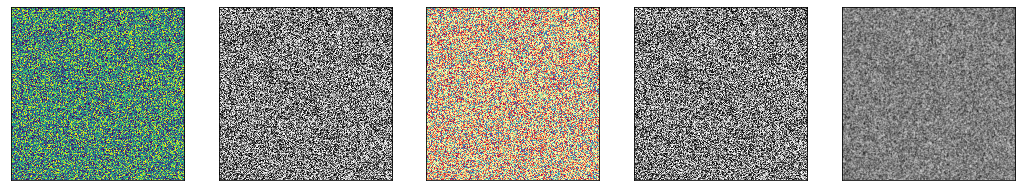

In [4]:
fig,axes=plt.subplots(1,5,figsize=(18,18))
axes[0].imshow(sample_image) # Displaying image, (greenish-bluish color map in matplotlib by default)
axes[1].imshow(sample_image,cmap='gray') # Displaying image in grayscale
axes[2].imshow(sample_image,cmap='Spectral') # Spectral colormap
axes[3].imshow(sample_image,cmap='gray',interpolation='nearest') # It is the most basic interpolation algorithm which requires closest one neighbouring pixel to perform interpolation. Using known data to estimate value at unknown points
axes[4].imshow(sample_image,cmap='gray',interpolation='gaussian') # fill unknown values using gaussian interpolation technique

for ax in axes: # Removing ticks of x and y axes for each figure
    ax.set_xticks([])
    ax.set_yticks([])

#### Image Characteristics

Type: <class 'numpy.ndarray'>
Shape: (512, 512)
Size: 262144
Minimum Value: 0
Maximum Value: 255
Mean Value: 118.31400299072266


array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

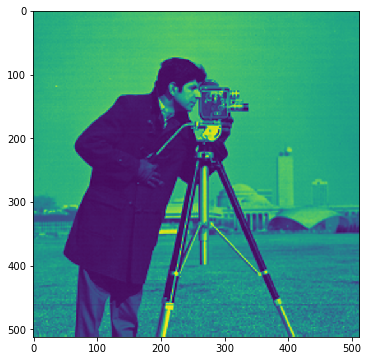

In [5]:
camera= data.camera() # example image
plt.figure(figsize=(8,6))
plt.imshow(camera) # greenish-bluish by default

print('Type: {}'.format(type(camera)))
print('Shape: {}'.format(camera.shape))
print('Size: {}'.format(camera.size)) # total number of pixels available in image (multiply total rows and column)
print('Minimum Value: {}'.format(camera.min()))
print('Maximum Value: {}'.format(camera.max()))
print('Mean Value: {}'.format(camera.mean()))

camera # image values ranginging from 0 to 255

#### Reading and Masking Images

Shape: (350, 526, 3)


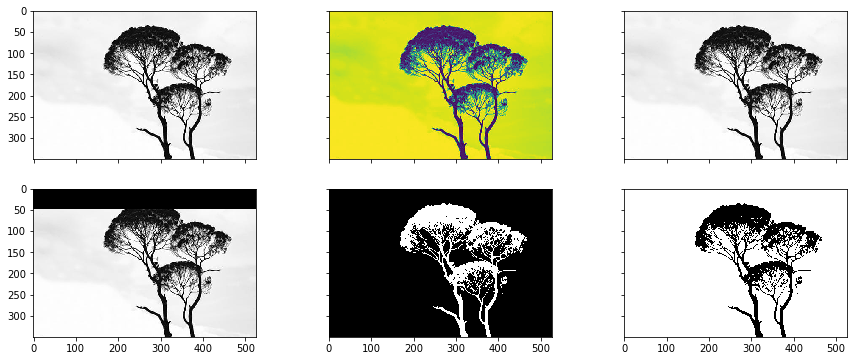

In [6]:
fig,axes=plt.subplots(2,3,figsize=(15,6),sharex=True, sharey=True)
tree=skimage.io.imread("./imgs/pexels-tree.jpg") # reading image from local machine
print('Shape: {}'.format(tree.shape))
axes[0,0].imshow(tree) # Original Image

tree1=skimage.io.imread("./imgs/pexels-tree.jpg",as_gray=True) 
axes[0,1].imshow(tree1) # greenish-bluish by default

axes[0,2].imshow(tree1,cmap='gray'); # Grayscale image

# Masking Images using Array Manipulation
tree_copy=tree1.copy()
tree_copy[:50]=0
axes[1,0].imshow(tree_copy,cmap='gray');

tree_copy1=tree1.copy()
mask=tree_copy1 < 0.5
tree_copy1[mask]=255
axes[1,1].imshow(tree_copy1,cmap='gray');

tree_copy2=tree1.copy()
mask=tree_copy2 > 0.5
tree_copy2[mask]=255
axes[1,2].imshow(tree_copy2,cmap='gray');

Shape: (2848, 4272, 3)


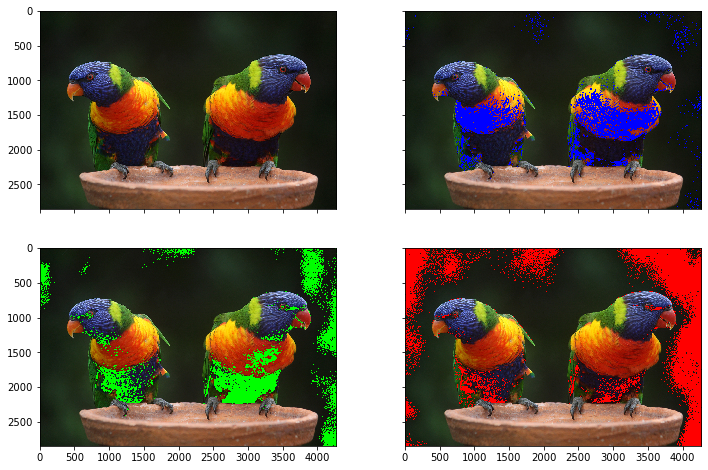

In [7]:
# Masking Color Image

fig,axes=plt.subplots(2,2,figsize=(12,8),sharex=True, sharey=True)
parrot=skimage.io.imread("./imgs/pexels-parrot.jpg")
print('Shape: {}'.format(parrot.shape))
axes[0,0].imshow(parrot)

parrot_copy=parrot.copy()
blue_mask=parrot_copy[:,:,2] < 10 # RGB channel at index 2 is the blue channel
parrot_copy[blue_mask]=[0,0,255]
axes[0,1].imshow(parrot_copy,cmap='gray');

parrot_copy2=parrot.copy()
green_mask=parrot_copy2[:,:,1] < 20 # RGB channel at index 1 is the green channel
parrot_copy2[green_mask]=[0,255,0]
axes[1,0].imshow(parrot_copy2,cmap='gray');

parrot_copy3=parrot.copy()
red_mask=parrot_copy3[:,:,0] < 20 # RGB channel at index 0 is the red channel
parrot_copy3[red_mask]=[255,0,0]
axes[1,1].imshow(parrot_copy3,cmap='gray');

#### Zooming Image

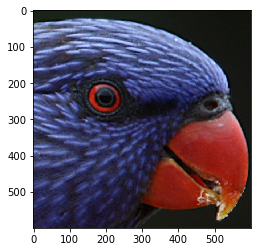

In [8]:
parrot_zoom=parrot[600:1200, 3300:3900] # Clip out a portion from the image by specifing [r1:c1, r2:c2]
plt.imshow(parrot_zoom,cmap='gray');

#### Creating an array of images

In [9]:
many_parrots= np.array([parrot_zoom.copy(),parrot_zoom.copy(),parrot_zoom.copy(),parrot_zoom.copy()])
print('Shape for array of images: {}'.format(many_parrots.shape)) # (batch_size, height, width, number of channels)

Shape for array of images: (4, 600, 600, 3)


#### Comparison of interpolation techniques on an image

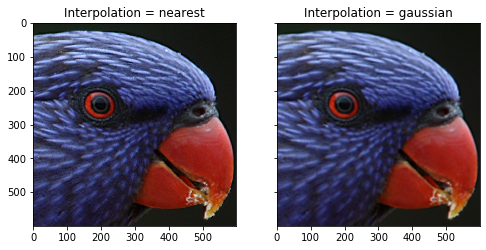

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8,8),sharex=True, sharey=True)
ax = axes.ravel() # ravel() returns a 1-d array made out of input

ax[0].set_title("Interpolation = nearest")
ax[0].imshow(parrot_zoom, interpolation='nearest')

ax[1].set_title("Interpolation = gaussian")
ax[1].imshow(parrot_zoom, interpolation='gaussian')  

#### Converting a RGB Image to Grayscale Image

Shape of Original image: (344, 516, 3)
Shape of Grayscale image: (344, 516)


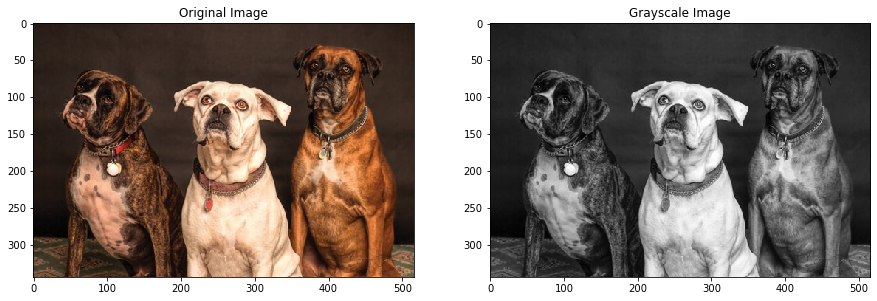

In [11]:
from skimage import color

original_three_dogs = skimage.io.imread("./imgs/pexels-3-dogs.jpg")
three_dogs = color.rgb2gray(original_three_dogs) # Convert a color RGB image into gray-scale image

fig,axes=plt.subplots(1,2,figsize=(15,15))

ax= axes.ravel()
ax[0].set_title("Original Image")
ax[0].imshow(original_three_dogs, cmap="gray") # Original Image

ax[1].set_title("Grayscale Image")
ax[1].imshow(three_dogs, cmap="gray")

print("Shape of Original image: {}".format(original_three_dogs.shape))
print("Shape of Grayscale image: {}".format(three_dogs.shape))

#### Block Views
It is a technique to extract non-overlapping image patches in order to perform local operations on these patches.

#### Pooling
A window function which performs an aggregation on the input to extract significant features. Pooling is widely used in Convolutional Neural Networks (CNNs) as it allows extraction of features in a location invariant manner.

|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|
|-|-|-|
|![max_pooling](https://github.com/jamwine/Scikit-Image/blob/master/imgs/max_pooling.png?raw=true)|![min_pooling](https://github.com/jamwine/Scikit-Image/blob/master/imgs/min_pooling.png?raw=true)|![avg_pooling](https://github.com/jamwine/Scikit-Image/blob/master/imgs/avg_pooling.png?raw=true)

In [12]:
from skimage.util import view_as_blocks

block_shape = (4, 4) # Creating a Square block of 4x4
three_dogs_blocks = view_as_blocks(three_dogs, block_shape)  

# In order to collapse 4x4 block into 1D, flatten the image in such way that the data in pixels should not change (-1)
flattened_blocks = three_dogs_blocks.reshape(three_dogs_blocks.shape[0], three_dogs_blocks.shape[1], -1)
print('Shape of the blocks image :', three_dogs_blocks.shape)
print('Shape of the flattened image :', flattened_blocks.shape)

Shape of the blocks image : (86, 129, 4, 4)
Shape of the flattened image : (86, 129, 16)


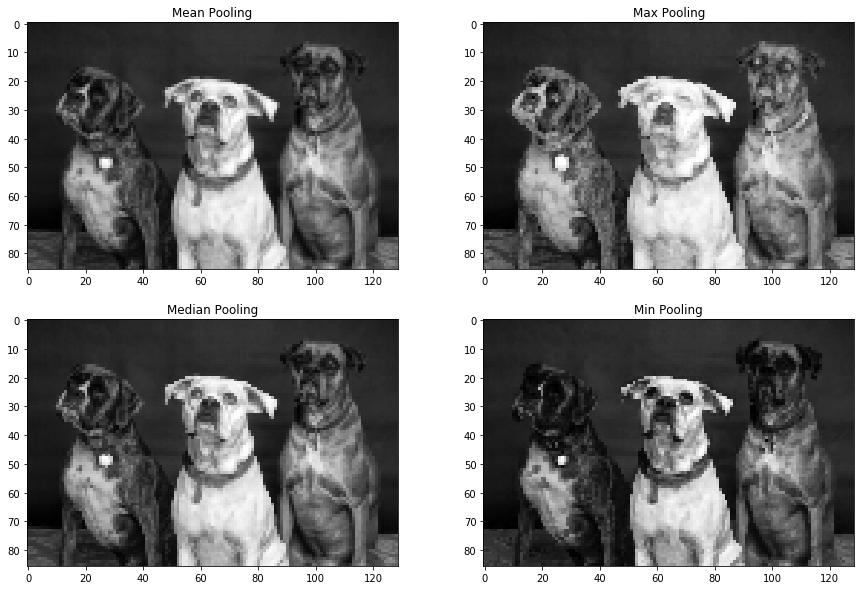

In [13]:
mean_blocks = np.mean(flattened_blocks, axis=2) # Mean Pooling
max_blocks = np.max(flattened_blocks, axis=2) # Max Pooling
median_blocks = np.median(flattened_blocks, axis=2) # Median Pooling
min_blocks = np.min(flattened_blocks, axis=2) # Min Pooling

fig,axes=plt.subplots(2,2,figsize=(15,10))
ax=axes.ravel()

ax[0].set_title("Mean Pooling")
ax[0].imshow(mean_blocks, interpolation='nearest', cmap='gray')

ax[1].set_title("Max Pooling")
ax[1].imshow(max_blocks, interpolation='nearest', cmap='gray')

ax[2].set_title("Median Pooling")
ax[2].imshow(median_blocks, interpolation='nearest', cmap='gray')

ax[3].set_title("Min Pooling")
ax[3].imshow(min_blocks, interpolation='nearest', cmap='gray');

#### Contour Line
A curve along connecting pixels with the same color; more generally a curve along which a function has the same value. These are also known as equipotential curvers, indifference curvers, isopleths, isoclines, etc. 

Two types of Contours are:
* Isolines: Lines exactly follow single data value, the common data value is called the isovalue
* Isobands: Areas between isolines are filled with

#### The Marching Squares algorithm: 
An easy-to-implement, embarrassingly parallel algorithm that generates contours for a two-dimensional (rectangular) array

#### Embarrassingly Parallel Algorithm
Where little or no effort is needed to separate the problem into a number of parallel tasks, usually because there is little or no dependency or need for communication between those parallel tasks

**NOTE**: PNG images have a 4th dimension (4 channels), the alpha or the opacity


Shape: (227, 568, 4)
Number of Contours with 0.5 level: 4
Number of Contours with 0.9 level: 5


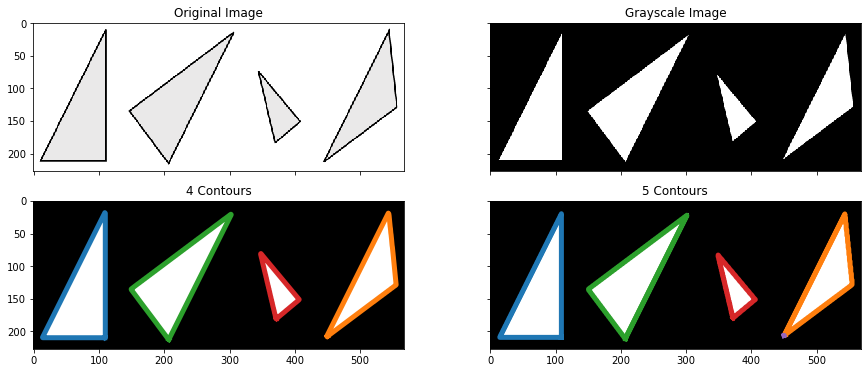

In [14]:
from skimage import measure

fig,axes=plt.subplots(2,2,figsize=(15,6),sharex=True, sharey=True)
ax=axes.ravel()

shapes = skimage.io.imread("./imgs/shapes.png")
print('Shape: {}'.format(shapes.shape))
ax[0].set_title('Original Image')
ax[0].imshow(shapes)

shapes = color.rgb2gray(shapes)
ax[1].set_title('Grayscale Image')
ax[1].imshow(shapes, cmap='gray', interpolation='nearest')

# By changing the level, the number of contours will be different
contours1 = measure.find_contours(shapes, 0.5) 
print('Number of Contours with 0.5 level: {}'.format(len(contours1)))
ax[2].imshow(shapes, cmap='gray', interpolation='nearest')
for n, contour in enumerate(contours1):   
    ax[2].plot(contour[:, 1], contour[:, 0],  linewidth=5)
ax[2].set_title('4 Contours')

contours2 = measure.find_contours(shapes, 0.9) 
print('Number of Contours with 0.9 level: {}'.format(len(contours2)))
ax[3].imshow(shapes, cmap='gray', interpolation='nearest')
for n, contour in enumerate(contours2):   
    ax[3].plot(contour[:, 1], contour[:, 0],  linewidth=5)   
ax[3].set_title('5 Contours'); # Notice a small dot at the corner of the last edge

#### Building a random complex image and finding contours

Shape: (100, 100)
Number of Contours with 0.7 level: 7
Number of Contours with 0.9 level: 4
Number of Contours with 0.1 level: 2


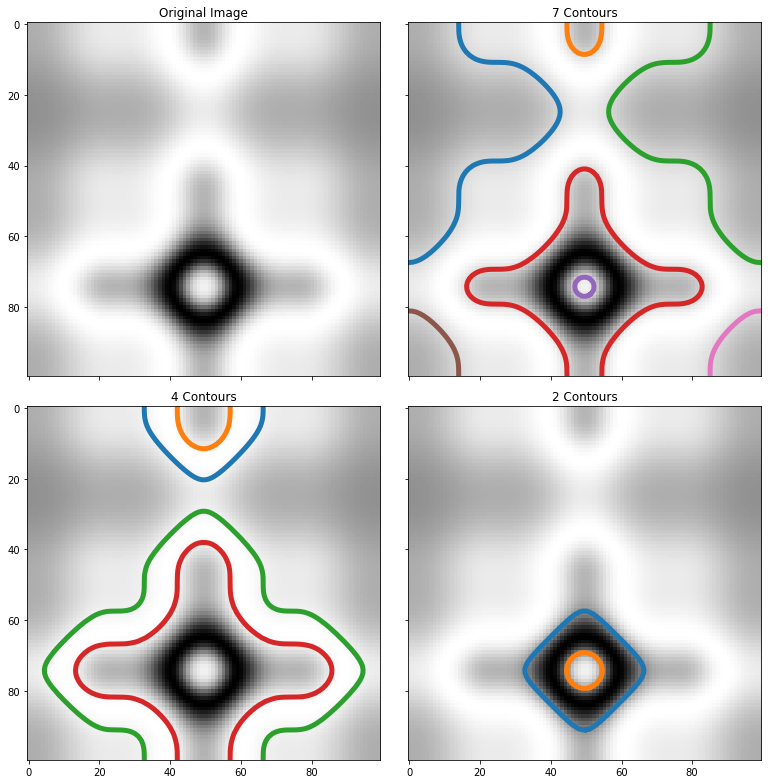

In [15]:
A, B = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
complex_image = np.sin(np.exp((np.sin(A)**3 + np.cos(B)**3)))
print('Shape: {}'.format(complex_image.shape))

fig,axes=plt.subplots(2,2,figsize=(11,11), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image')
ax[0].imshow(complex_image, cmap='gray');

contours3 = measure.find_contours(complex_image, 0.7) 
print('Number of Contours with 0.7 level: {}'.format(len(contours3)))
ax[1].set_title('{} Contours'.format(len(contours3)))
ax[1].imshow(complex_image, cmap='gray',interpolation='nearest');
for n, contour in enumerate(contours3):   
    ax[1].plot(contour[:, 1], contour[:, 0],  linewidth=5)   

contours4 = measure.find_contours(complex_image, 0.9) 
print('Number of Contours with 0.9 level: {}'.format(len(contours4)))
ax[2].set_title('{} Contours'.format(len(contours4)))
ax[2].imshow(complex_image, cmap='gray',interpolation='nearest');
for n, contour in enumerate(contours4):   
    ax[2].plot(contour[:, 1], contour[:, 0],  linewidth=5)   

contours5 = measure.find_contours(complex_image, 0.1) 
print('Number of Contours with 0.1 level: {}'.format(len(contours5)))
ax[3].set_title('{} Contours'.format(len(contours5)))
ax[3].imshow(complex_image, cmap='gray',interpolation='nearest');
for n, contour in enumerate(contours5):   
    ax[3].plot(contour[:, 1], contour[:, 0],  linewidth=5) 
    
plt.tight_layout() 

#### Inverting the Original Image

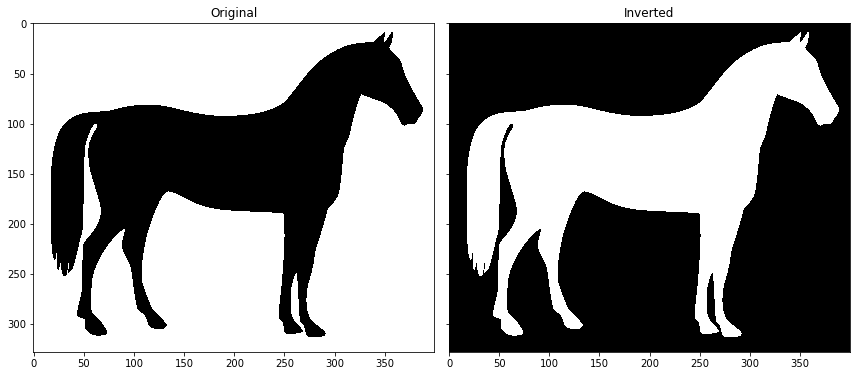

In [16]:
from skimage.util import invert

horse_image = data.horse()   
horse_inverted = invert(data.horse()) 

fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)  
ax = axes.ravel() 

ax[0].set_title('Original')
ax[0].imshow(horse_image, cmap='gray')

ax[1].set_title('Inverted')
ax[1].imshow(horse_inverted, cmap='gray')

fig.tight_layout() 

#### Convex Hull
Given a X, a set of points in a plane, the convex hull of X is the smallest convex polygon that contains all points in X

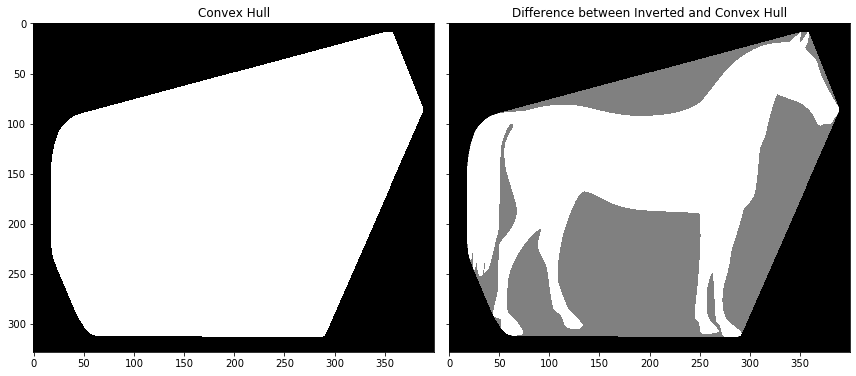

In [17]:
from skimage.morphology import convex_hull_image
from skimage import img_as_float

# Find the smallest convex polygon which will surround all white pixels in the inverted image
convexhull_horse = convex_hull_image(horse_inverted)

fig, axes = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True) 
ax = axes.ravel()

ax[0].set_title('Convex Hull')
ax[0].imshow(convexhull_horse, cmap='gray', interpolation='nearest')  

# Copy the image with convex hull and convert it in float to new object
convexhull_diff = img_as_float(convexhull_horse.copy()) 
# Fill the inverted horse image to differentiate convex hull and the horse object
convexhull_diff[horse_inverted] = 2

ax[1].set_title('Difference between Inverted and Convex Hull')
ax[1].imshow(convexhull_diff,cmap='gray', interpolation='nearest')  

plt.tight_layout()  

#### Edge
Curve connecting points where intensity (brightness) of pixels changes abruptly.

#### Edge Detection
Techniques that detect edges in images.

#### Zero-crossing Edge Detection
Point along curve where value flips sign, for example: positive to negative, or negative to positive. In a continuous curve, this occurs at value of zero.

#### Search-based Edge Detection
Find the measure of edge strength, i.e. search for the direction of maxima . For this, the first step is to compute derivatives in x and y directions. Next, find the gradient magnitude and apply threshold to the gradient magnitude. For a simple and quick operation, a pair of 2x2 convolution kernels is designed to respond maximally to edges running at 45° to the pixel grid. 

|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|
|-|-|-|
|![sbed1](https://github.com/jamwine/Scikit-Image/blob/master/imgs/sbed1.png?raw=true)|![sbed2](https://github.com/jamwine/Scikit-Image/blob/master/imgs/sbed2.png?raw=true)|![sbed3](https://github.com/jamwine/Scikit-Image/blob/master/imgs/sbed3.png?raw=true)|

* Single Maxima: Edge
* Multiple Maxima: Corner

In this context, **convolution** is a sliding window function applied to a matrix

|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|
|-|-|
|![conv1](https://github.com/jamwine/Scikit-Image/blob/master/imgs/conv1.png?raw=true)|![conv2](https://github.com/jamwine/Scikit-Image/blob/master/imgs/conv2.png?raw=true)

The **kernel** has weights which are tuned to extract edges

#### Roberts Cross Edge Detector
Calculates Edge magnitude using Roberts' cross operator

* The Roberts Cross operator performs a simple, quick to compute, 2-D spatial gradient measurement on an image. 
* It thus highlights regions of high spatial frequency which often correspond to edges. 
* Pixel values at each point in the output represent the estimated absolute magnitude of the spatial gradient of the     input image at that point. 
* <b>The main reason for using the Roberts Cross operator</b> is that it is <b>very quick to compute</b>. 
* <b>Only four input pixels</b> need to be examined to determine the value of each output pixel.
* <b>The main disadvantage of Robert cross operator is small kernel which is very sensitive to noise.</b>

#### Sobel Edge Detector
Calculates Edge magnitude using Sobels' cross operator

* <b>The Sobel Operator</b> is very similar to Roberts Cross operator but the difference is it uses a pair of <b>3x3 convolution kernel</b> whereas <b>Robertes operator uses a 2x2 convolution kernel.</b> 
* <b>It is slower than the Roberts Cross operator in computation, but its larger convolution kernel smooths the input image</b>
* Thus, It is less sensitive to noise
* The Sobel operator also generally produces considerably <b>higher output values for similar edges</b>, compared with the Roberts Cross.

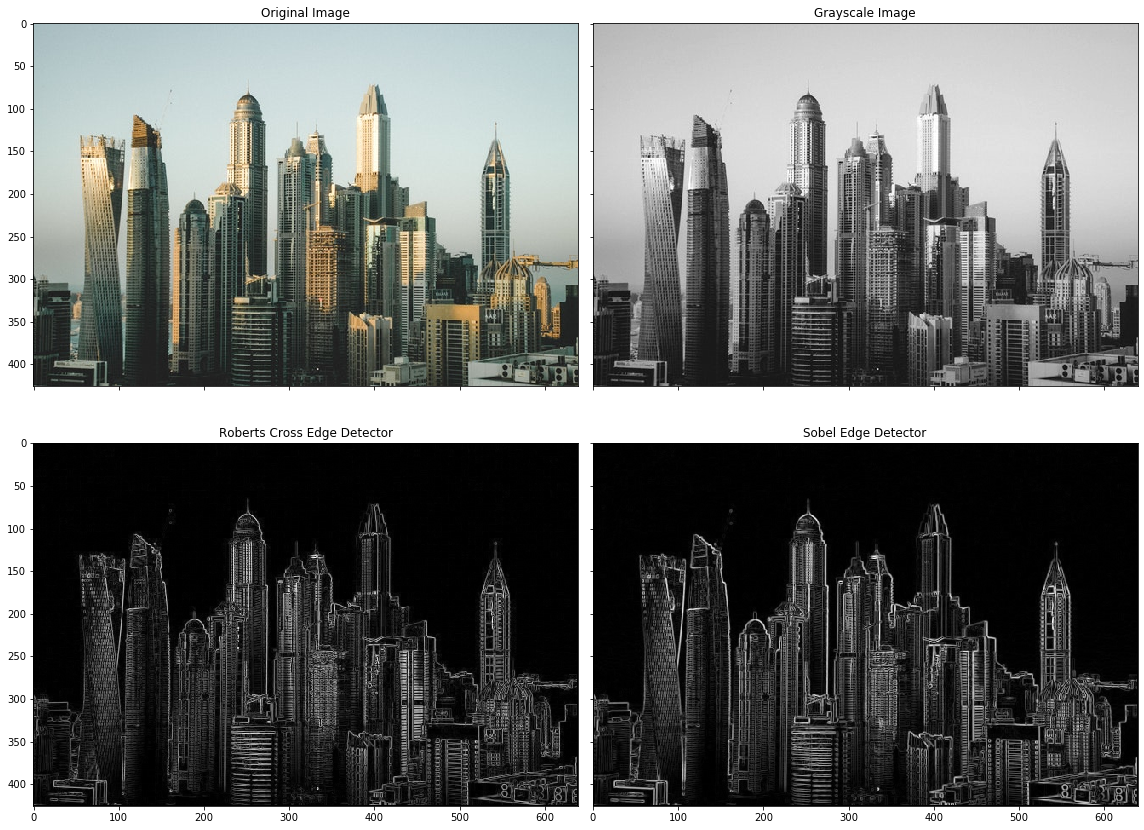

In [18]:
from skimage.filters import roberts, sobel

skyline_color = skimage.io.imread('./imgs/pexels-skyline.jpg')
skyline = color.rgb2gray(skyline_color)

fig,axes=plt.subplots(2,2,figsize=(16, 12),sharex=True, sharey=True)
ax=axes.ravel()

ax[0].set_title('Original Image')
ax[0].imshow(skyline_color, cmap='gray')

ax[1].set_title('Grayscale Image')
ax[1].imshow(skyline, cmap='gray')

skyline_edge_roberts = roberts(skyline)  
ax[2].imshow(skyline_edge_roberts, cmap='gray')
ax[2].set_title('Roberts Cross Edge Detector')

skyline_edge_sobel = sobel(skyline)  
ax[3].imshow(skyline_edge_sobel, cmap='gray')
ax[3].set_title('Sobel Edge Detector')

plt.tight_layout()

#### Canny Edge Detection
Multi-stage algorithm, named after its inventor, that detects useful structural information from images with greatly reduced data processing. This algorithm enhances the signal to noise ratio, thus producing better edge detection with noisy images.

![canny](https://github.com/jamwine/Scikit-Image/blob/master/imgs/canny.png?raw=True)

Steps to proceed with Canny Edge Detection:

|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|![wh](https://github.com/jamwine/Scikit-Image/blob/master/imgs/head.png?raw=True)|
|-|-|-|
|![canny1](https://github.com/jamwine/Scikit-Image/blob/master/imgs/canny1.png?raw=True)|![canny2](https://github.com/jamwine/Scikit-Image/blob/master/imgs/canny2.png?raw=True)|![canny3](https://github.com/jamwine/Scikit-Image/blob/master/imgs/canny3.png?raw=True)|

Gaussian Filter has a center point as Mean ($\mu$) and standard deviation as bandwidth ($\sigma$).
* Larger value of sigma: less sensitive to noise, detects only large edges
* Smaller value of sigma: more sensitive to noise, detects even fine edges

Need to strike a fine balance Sigma influences quality of feature extraction.

In [19]:
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.draw import polygon

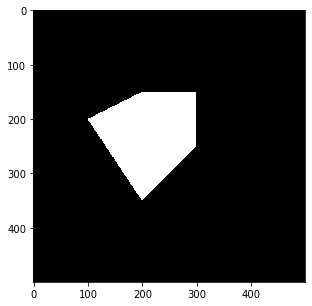

In [20]:
# Creating a sampple image

sample_image = np.zeros((500, 500), dtype=np.double)
poly = np.array(((200, 100), (150, 200), (150, 300), (250, 300), (350, 200)))

rr, cc = polygon(poly[:, 0], poly[:, 1], sample_image.shape)                      
sample_image[rr, cc] = 1 
plt.figure(figsize=(5, 5))
plt.imshow(sample_image, cmap='gray')

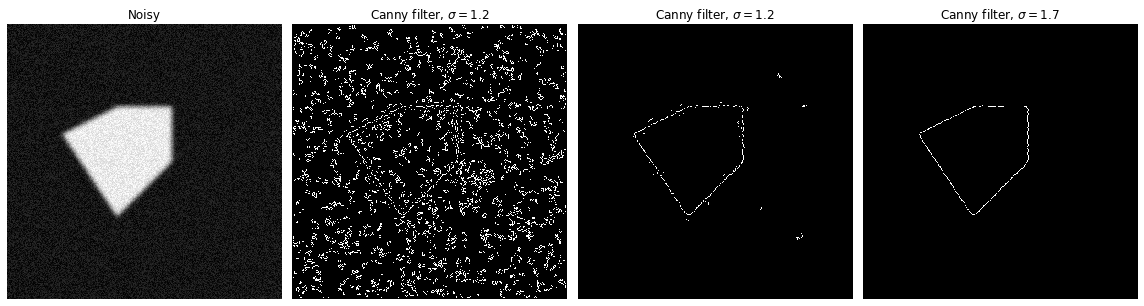

In [21]:
# Applying Gaussian Filter

im = ndi.gaussian_filter(sample_image, 4)
im += 0.2 * np.random.random(im.shape)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharex=True, sharey=True)

ax0.imshow(im, cmap='gray')
ax0.axis('off')
ax0.set_title('Noisy')

edges1 = canny(im, sigma=1)
ax1.imshow(edges1, cmap='gray')
ax1.axis('off')
ax1.set_title('Canny filter, $\sigma=1.2$')

edges12 = canny(im, sigma=1.3)
ax2.imshow(edges12, cmap='gray')
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1.2$')

edges2 = canny(im, sigma=1.7)
ax3.imshow(edges2, cmap='gray')
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=1.7$')

fig.tight_layout()

In [22]:
# fig,axes=plt.subplots(1,2,figsize=(14,12), sharex=True, sharey=True)
# ax = axes.ravel()

# test=skimage.io.imread('/test.png')
# test=test/255
# ax[0].set_title('Original Image')
# ax[0].imshow(test, cmap='gray');

# contours5 = measure.find_contours(test, 0.65) 
# new=[each for each in contours5 if (each.shape[0]>7000) & (each.mean()>1000)]

# ax[1].set_title('{} Contours'.format(len(new)))
# ax[1].imshow(test, cmap='gray',interpolation='nearest');

# for n, contour in enumerate(new):   
#     ax[1].plot(contour[:, 1], contour[:, 0],  linewidth=5)